In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import sklearn as sk
import tensorflow as tf
import keras as kr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [2]:
d = pd.read_csv("car data.csv")
d.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
d.shape

(301, 9)

In [4]:
print(d.Fuel_Type.value_counts())
print(d.Seller_Type.value_counts())
print(d.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [5]:
d.replace({"Fuel_Type":{'Petrol':0,'Diesel':1,'CNG':2}}, inplace = True)
d.replace({"Seller_Type":{'Dealer':0,'Individual':1}}, inplace = True)
d.replace({"Transmission":{'Manual':0,'Automatic':1}}, inplace = True)

In [7]:
d.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [8]:
X = d.drop(['Car_Name', 'Selling_Price'],axis=1)
y = d['Selling_Price']
print(X)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
prediction_train = model.predict(X_train)
# print(prediction_train)
error_score = metrics.r2_score(y_train, prediction_train)
print("R Squared Error : ", error_score)

R Squared Error :  0.8838169193709796


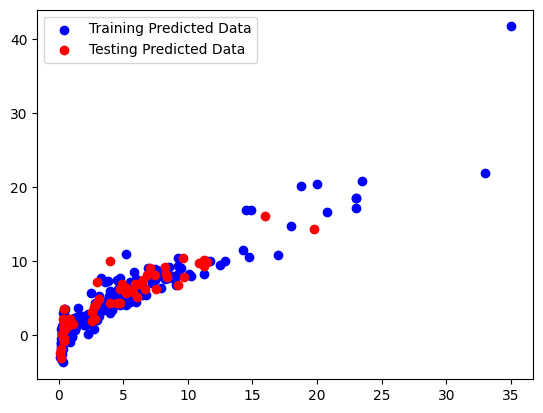

In [30]:
# prompt: show the difference between training data and predicted data using a scatter plot and show them in different colors alongwith Labels.

plt.scatter(y_train, prediction_train, color='blue', label="Training Predicted Data")
plt.scatter(y_test, model.predict(X_test), color='red', label="Testing Predicted Data")
plt.legend()
plt.show()


In [20]:
pred_test = model.predict(X_test)
error_score = metrics.r2_score(y_test, pred_test)
print("R Squared Error : ", error_score)

R Squared Error :  0.8401532365377697


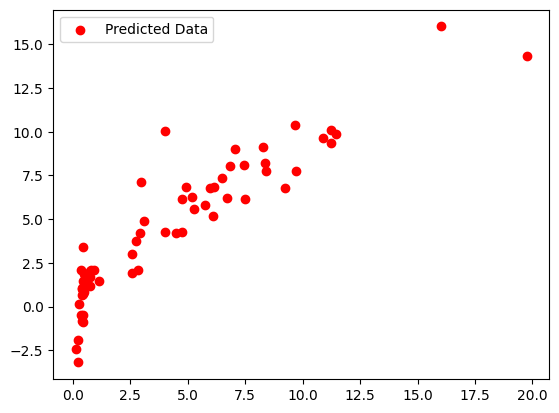

In [29]:
# prompt: show the difference between training data and predicted data using a scatter plot and show them in different colors alongwith Labels.

import matplotlib.pyplot as plt

# plt.scatter(y_train, prediction_train, color='blue', label="Training Data")
plt.scatter(y_test, pred_test, color='red', label="Predicted Data")
plt.legend()
plt.show()


In [31]:
lass_model = Lasso()
lass_model.fit(X_train, y_train)


Lasso()

In [32]:
training_data_prediction = lass_model.predict(X_train)

In [33]:
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R Squared Error: ", error_score)


R Squared Error:  0.843587395258283


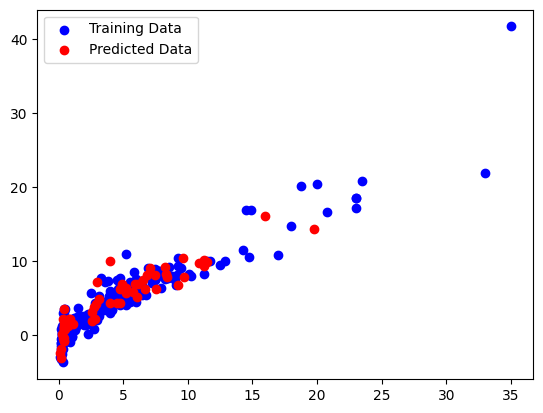

In [35]:
import matplotlib.pyplot as plt

plt.scatter(y_train, prediction_train, color='blue', label="Training Data")
plt.scatter(y_test, pred_test, color='red', label="Predicted Data")
plt.legend()
plt.show()

In [37]:
test_data_prediction = lass_model.predict(X_test)

In [39]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8497457570738539


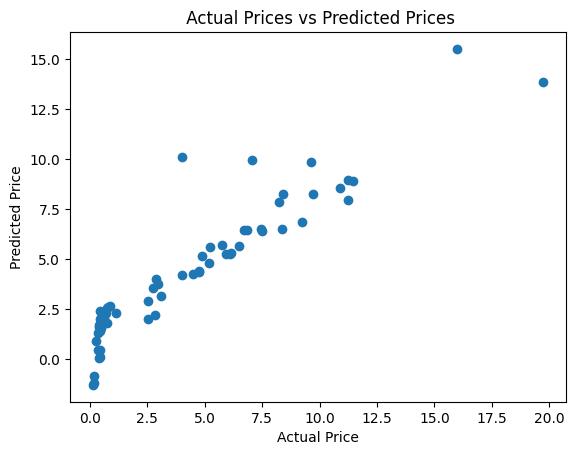

In [41]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()